<a href="https://colab.research.google.com/github/matthewtech-o/HAMOYE-INTERNSHIP/blob/main/hamoye_stage_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False, header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values='?')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.replace("?", np.nan, inplace=True)

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

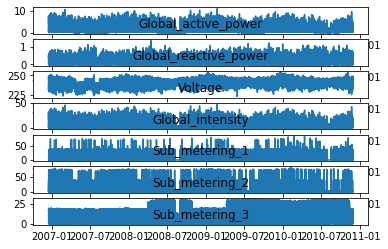

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [8]:
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()
plt.figure(figsize=(10,6))

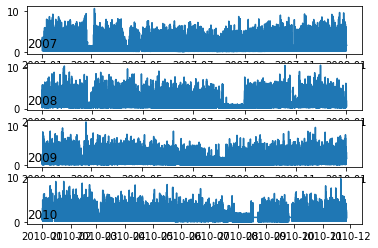

In [9]:
years = ['2007','2008','2009','2010']
plt.figure()
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = df[str(year)]
    plt.plot(result['Global_active_power'])
    plt.title(str(year), y=0, loc='left')
plt.show()

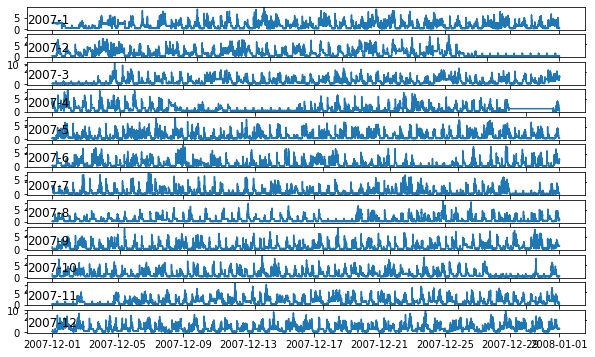

<Figure size 432x288 with 0 Axes>

In [10]:
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,6))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month= '2007-' + str(months[i])
    result = df[month]
    plt.plot(result['Global_active_power'])
    plt.title(month, y=0, loc='left')
plt.show()
plt.tight_layout()


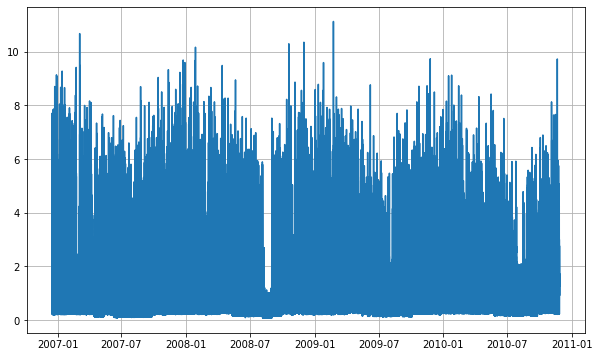

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_active_power)
plt.grid()

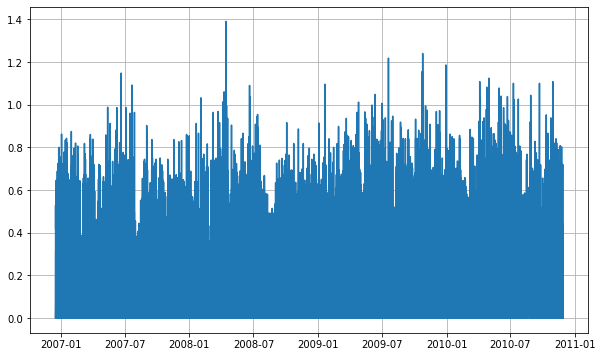

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_reactive_power)
plt.grid()


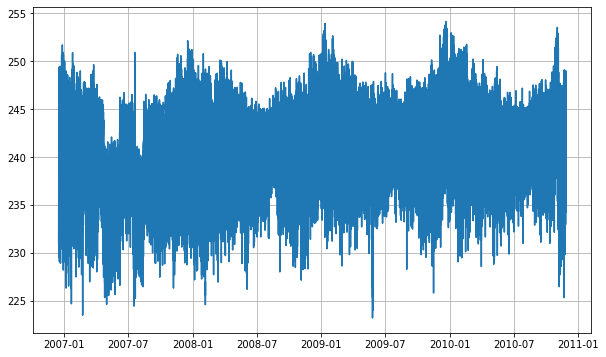

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.Voltage)
plt.grid()

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


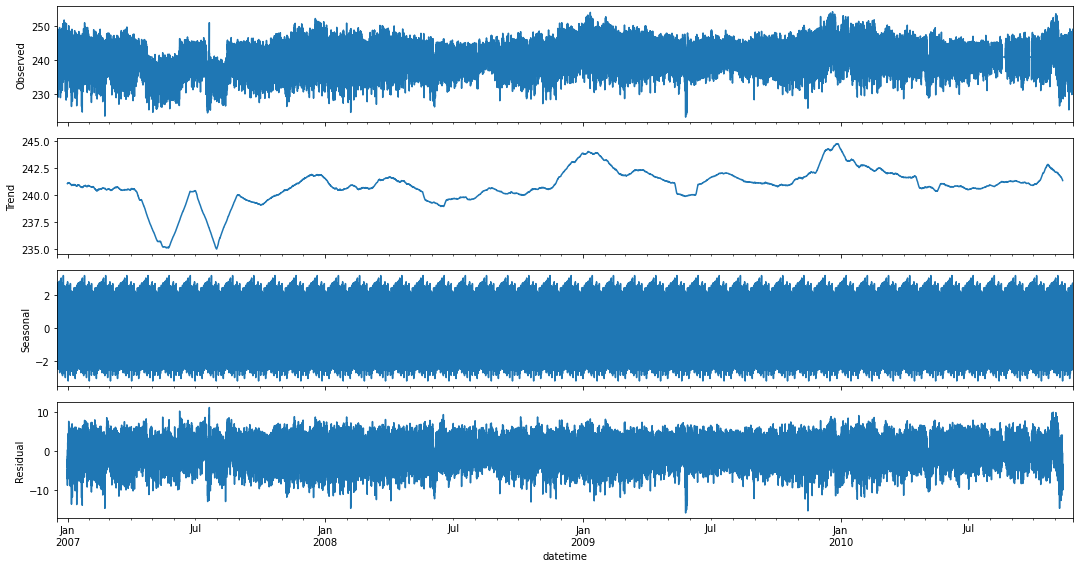

In [15]:
decompose_series = sm.tsa.seasonal_decompose(df['Voltage'], model='additive', freq=(60*24*30))
decompose_series.plot()
plt.show()

In [16]:
df_daily = df.resample('D').sum()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [17]:
df_monthly = df.resample('M').mean()
df_monthly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901148,0.131384,241.441016,8.029338,1.248613,2.214821,7.409385
2007-01-31,1.546014,0.132676,240.905098,6.546829,1.264230,1.775909,7.383309
2007-02-28,1.401068,0.113637,240.519406,5.914505,1.180214,1.602346,6.703545
2007-03-31,1.318622,0.114747,240.513476,5.572958,1.361338,2.346848,6.504647
2007-04-30,0.908462,0.119203,239.524112,3.894800,1.070716,1.001190,4.943236


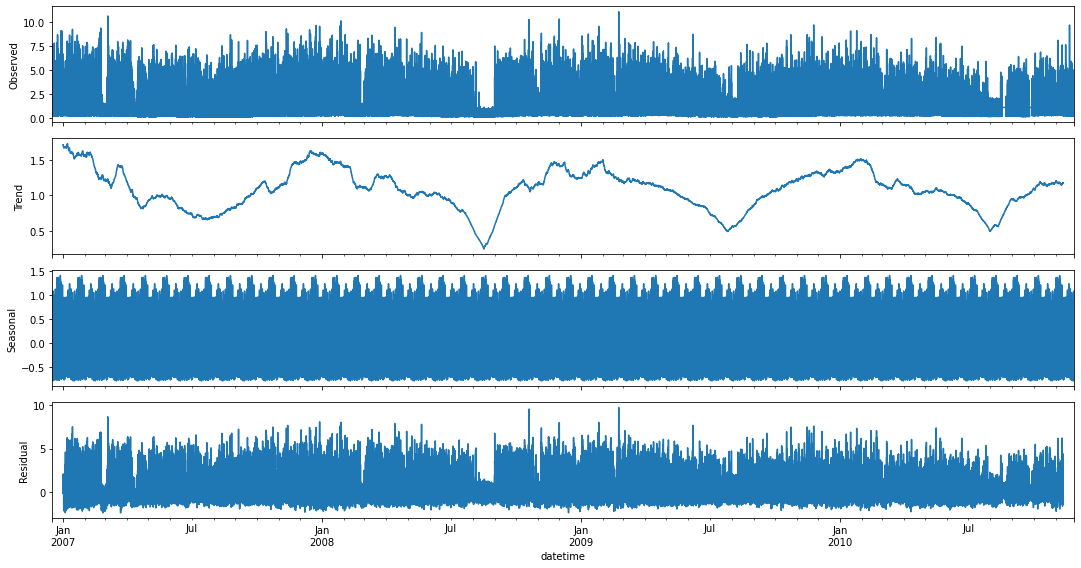

In [18]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [19]:
from fbprophet import Prophet

In [20]:
df_daily.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [21]:
df_daily2= df_daily.reset_index()
df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [22]:
df_daily2 = df_daily2[['datetime','Global_active_power']]
new_daily_df= df_daily2.rename(columns={"datetime":"ds","Global_active_power":"y"})
model_2 = Prophet()
model_2.fit(new_daily_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = model_2.make_future_dataframe(periods=365, freq='D')
forecast2 = model_2.predict(future)
forecast2.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1650.921151,1832.413149,2836.441775,1650.921151,1650.921151,700.624138,700.624138,700.624138,215.030687,215.030687,215.030687,485.593451,485.593451,485.593451,0.0,0.0,0.0,2351.545289
1,2006-12-17,1650.743725,1837.327880,2910.468156,1650.743725,1650.743725,682.123157,682.123157,682.123157,181.866769,181.866769,181.866769,500.256388,500.256388,500.256388,0.0,0.0,0.0,2332.866882
2,2006-12-18,1650.566299,1490.935974,2625.286732,1650.566299,1650.566299,384.545193,384.545193,384.545193,-130.500508,-130.500508,-130.500508,515.045701,515.045701,515.045701,0.0,0.0,0.0,2035.111491
3,2006-12-19,1650.388872,1610.191204,2709.457741,1650.388872,1650.388872,499.251759,499.251759,499.251759,-30.325173,-30.325173,-30.325173,529.576932,529.576932,529.576932,0.0,0.0,0.0,2149.640632
4,2006-12-20,1650.211446,1650.662667,2735.700598,1650.211446,1650.211446,531.549709,531.549709,531.549709,-11.918522,-11.918522,-11.918522,543.468230,543.468230,543.468230,0.0,0.0,0.0,2181.761155


In [24]:
forecast2[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2351.545289,1832.413149,2836.441775,1650.921151,1650.921151,1650.921151
1,2006-12-17,2332.866882,1837.327880,2910.468156,1650.743725,1650.743725,1650.743725
2,2006-12-18,2035.111491,1490.935974,2625.286732,1650.566299,1650.566299,1650.566299
3,2006-12-19,2149.640632,1610.191204,2709.457741,1650.388872,1650.388872,1650.388872
4,2006-12-20,2181.761155,1650.662667,2735.700598,1650.211446,1650.211446,1650.211446
...,...,...,...,...,...,...,...
1802,2011-11-22,2046.132053,1486.931299,2561.643479,1613.532176,1604.745620,1622.359570
1803,2011-11-23,2070.251171,1520.675312,2599.192332,1613.603830,1604.766228,1622.437348
1804,2011-11-24,1929.867175,1399.937186,2491.671195,1613.675484,1604.786837,1622.512234
1805,2011-11-25,2016.662447,1452.403743,2594.596854,1613.747138,1604.809157,1622.590095


In [25]:
df['Voltage'].corr(df['Global_intensity'])

-0.41136307176847076

In [26]:
df['Global_active_power'].corr(df['Global_reactive_power'])

0.24701705264406407

In [27]:
pearsoncorr = df.corr(method='pearson')

In [28]:
pearsoncorr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [25]:
df_GAP = df_daily2['Global_active_power']

In [29]:
# create test dataset, remove last 12 months
train_df = df_daily2.drop(df_daily2.index[-365:])
print(train_df.tail())

       datetime  Global_active_power
1072 2009-11-22             2450.976
1073 2009-11-23             1471.122
1074 2009-11-24             2128.856
1075 2009-11-25             1980.130
1076 2009-11-26             1599.626


In [30]:
df_daily2.tail(2)

,datetime,Global_active_power
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [31]:
new_train_df= train_df.rename(columns={"datetime":"ds","Global_active_power":"y"})

In [32]:
model = Prophet()
model.fit(new_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1437,2010-11-22,2038.931308,1488.742727,2579.221262
1438,2010-11-23,2181.103668,1629.594587,2792.506499
1439,2010-11-24,2192.185077,1630.183173,2767.601640
1440,2010-11-25,2024.913261,1450.806793,2578.647363
1441,2010-11-26,2155.222509,1617.657189,2714.657064


In [34]:
# calculate MAE between expected and predicted values for december
y_true = df_daily2['Global_active_power'][-365:].values
y_pred = forecast['yhat'][-365:].values

In [35]:
MAE = np.mean(np.abs((y_true - y_pred)/y_true))
MAE

0.20884985090046293

In [36]:
forecast['yhat'].tail()

1437    2038.931308
1438    2181.103668
1439    2192.185077
1440    2024.913261
1441    2155.222509
Name: yhat, dtype: float64

In [37]:
df_daily2['Global_active_power'].tail()

1437    2041.536
1438    1577.536
1439    1796.248
1440    1431.164
1441    1488.104
Name: Global_active_power, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 2)

374.95

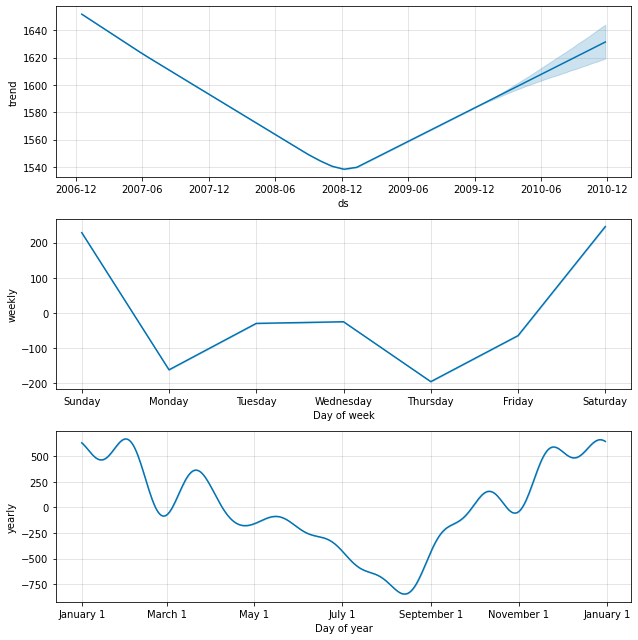

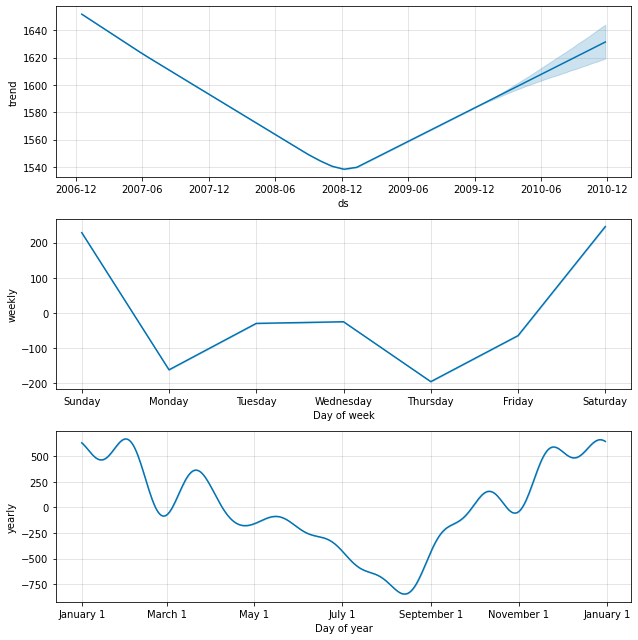

In [39]:
model.plot_components(forecast)